# Comparing Luminosity from ASTERIA and SNOwGLoBES
   This notebook compares the luminosity versus time plots as generated by the ASTERIA fits files and the SNOwGLoBES tar files for one of the Nakazato models

In [1]:
import numpy as np

import os
import io
import tarfile

from snewpy.models import *
from snewpy.FlavorTransformation import *


import astropy.units as u

## Load `SupernovaModel` class
The class `Sukhbold02015` inherits from `SupernovaModel`, and uses the ASTERIA fits file format to load an object `model`.

In [2]:
model = Sukhbold2015('../../models/Sukhbold_2015/sukhbold-LS220-s27.0.fits', NoTransformation)

### Plot Luminosity versus Time using the `get_luminosity()` function

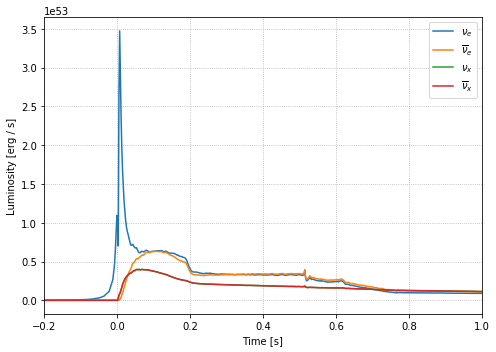

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
t = model.get_time()
for flavor in Flavor:
    ax.plot(t, model.get_luminosity(flavor), label = flavor.to_tex())
ax.set(xlabel = 'Time [{}]'.format(t.unit),
       ylabel = 'Luminosity [{}]'.format(model.get_luminosity(flavor).unit),
       xlim = (-0.2, 1))
ax.legend()
ax.grid(ls = ':')
fig.tight_layout()  

### Plot Luminosity using the `get_initialspectra()` function

In [5]:
energy = np.linspace(0.1, 100, 501) * u.MeV 
luminosity = {}

for flavor in Flavor:
    lum = []
    for t in model.get_time():
        spectra = model.get_initialspectra(t, energy)
        lum.append(np.trapz(spectra[flavor].value, energy.to('erg').value) * model.meanE[flavor](t) * u.MeV.to('erg'))
    luminosity[flavor] = lum * u.erg / u.s
#     break

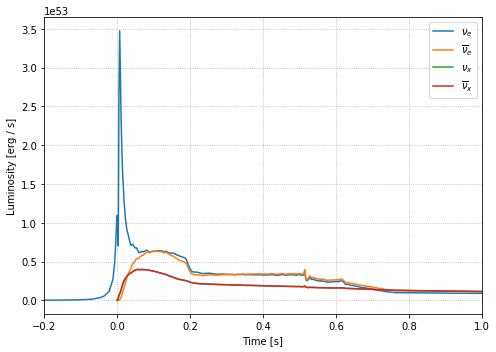

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for k in luminosity:
    ax.plot(model.get_time(), luminosity[k], label = k.to_tex())
ax.set(xlabel = 'Time [{}]'.format(model.get_time().unit),
       ylabel = 'Luminosity [{}]'.format(luminosity[k].unit),
       xlim = (-0.2, 1))
ax.grid(ls = ':')
ax.legend()
fig.tight_layout()

## Load `SNOwGLoBES` class
The object `sn` of the `SNOwGLoBES` class uses the tarfile format of SNOwGLoBES to load the number flux (fluence) versus energy for each time bin. The following calculations convert the fluence to luminosity as a function of time.

In [7]:
sn = SNOwGLoBES('../../models/Sukhbold_2015/sukhbold-LS220-s27.0.SNOformat.tar.bz2')

In [11]:
sn.get_luminosity()['NuE']

<Quantity [           nan,            nan,            nan, ...,
           5.56528354e+49, 5.51857091e+49, 5.47951705e+49] erg / s>

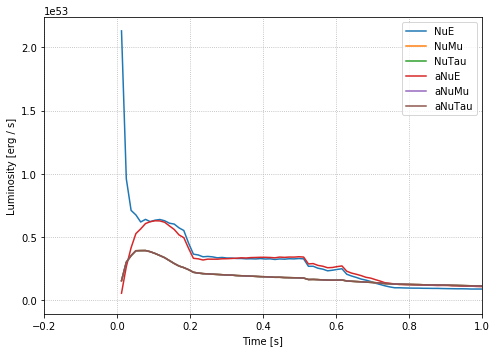

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for flavor in ['NuE', 'NuMu', 'NuTau', 'aNuE', 'aNuMu', 'aNuTau']:
    ax.plot(sn.time, sn.get_luminosity()[flavor], label = flavor)
ax.set(xlabel = 'Time [{}]'.format(sn.time.unit),
       ylabel = 'Luminosity [{}]'.format(sn.get_luminosity()[flavor].unit),
       xlim = (-0.2, 1))
ax.legend()
ax.grid(ls = ':')
fig.tight_layout()

In [10]:
model.get_time()[0]

-0.349455361517